In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [17]:
df.describe()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age
count,2500.00000,2500.000000,2500,2500,2500.000000
mean,1250.50000,12.508400,2022-07-30 08:06:43.200000,2023-06-21 10:33:36,38.795600
min,1.00000,10.000000,2021-05-09 00:00:00,2023-01-07 00:00:00,26.000000
25%,625.75000,11.000000,2022-06-15 00:00:00,2023-05-07 00:00:00,32.000000
50%,1250.50000,12.000000,2022-08-07 00:00:00,2023-06-28 00:00:00,39.000000
75%,1875.25000,14.000000,2022-10-09 00:00:00,2023-08-07 00:00:00,45.000000
max,2500.00000,15.000000,2023-12-01 00:00:00,2023-12-07 00:00:00,51.000000
std,721.83216,1.686851,NaN,NaN,7.171778


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 175.9+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df["Plan Duration"].unique()

array(['1 Month'], dtype=object)

In [7]:
df = df.drop("Plan Duration", axis = 1)

In [8]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

C:\Users\ASUS 14\AppData\Local\Temp\ipykernel_14276\602469439.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Join Date'] = pd.to_datetime(df['Join Date'])
C:\Users\ASUS 14\AppData\Local\Temp\ipykernel_14276\602469439.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 175.9+ KB


In [20]:
sub_cnts = df['Subscription Type'].value_counts()
px.pie(sub_cnts, names=sub_cnts.index, values=sub_cnts.values, title='Distribution of Subscription Types', color_discrete_sequence=px.colors.sequential.Jet, hole = 0.5)

C:\Users\ASUS 14\AppData\Local\Temp\ipykernel_14276\1611799175.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




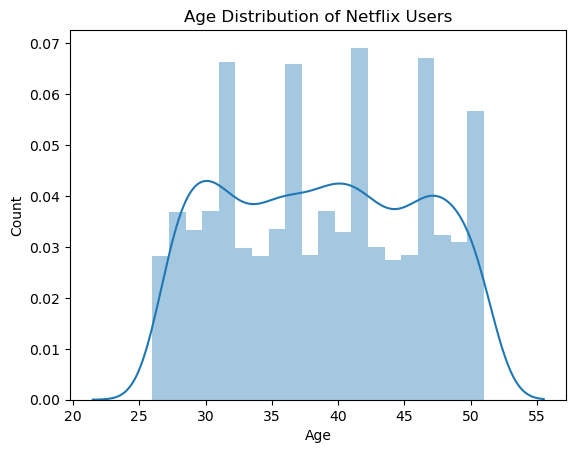

In [11]:
sns.distplot(df['Age'],bins = 20)
plt.title('Age Distribution of Netflix Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

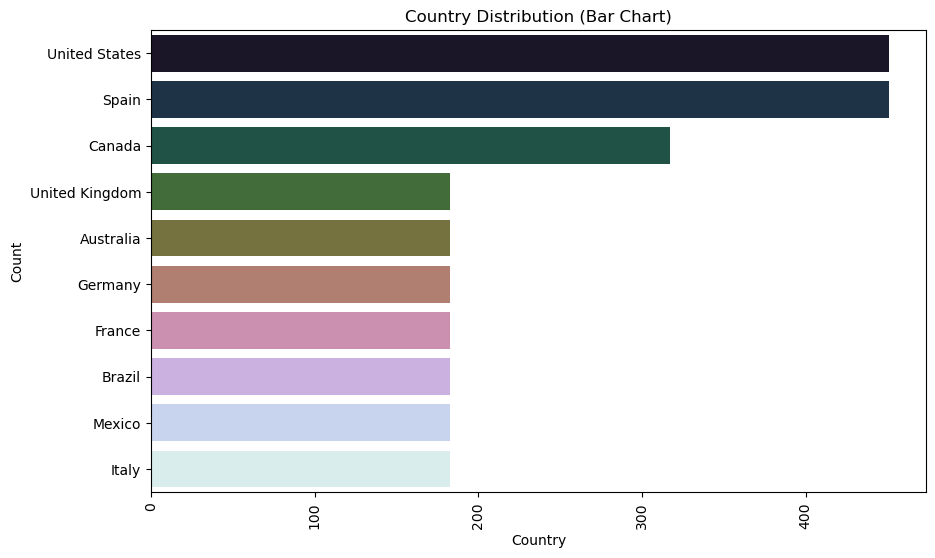

In [12]:
country_counts = df['Country'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=country_counts.index, x=country_counts.values, palette= "cubehelix")
plt.title('Country Distribution (Bar Chart)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation="vertical")
plt.show()

In [13]:
gender_counts = df['Gender'].value_counts()
px.pie(gender_counts, names=gender_counts.index, values=gender_counts.values, title='Gender Distribution', hole=0.5, color_discrete_sequence=px.colors.sequential.Blackbody)

In [21]:
device_counts = df['Device'].value_counts()
px.pie(device_counts, names=device_counts.index, values=device_counts.values, title='Device Distribution', color_discrete_sequence=px.colors.sequential.RdBu, hole=0.5)

In [14]:
px.box(df, x="Subscription Type", y="Age", color="Gender", notched=True, color_discrete_sequence=px.colors.sequential.Rainbow)

In [15]:
fig = px.sunburst(df, path=["Country", "Subscription Type"], values="Monthly Revenue", title="Sunburst Chart with Text Labels")
fig.update_traces(textinfo="label+value+percent parent")
fig.show()

In [16]:
px.choropleth(df, locations="Country", locationmode="country names", color="Monthly Revenue", title="Choropleth Map of Monthly Revenue by Country")